Accuracy: 0.75
Confusion Matrix:
[[3 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      1.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.88      0.43         4
weighted avg       1.00      0.75      0.86         4



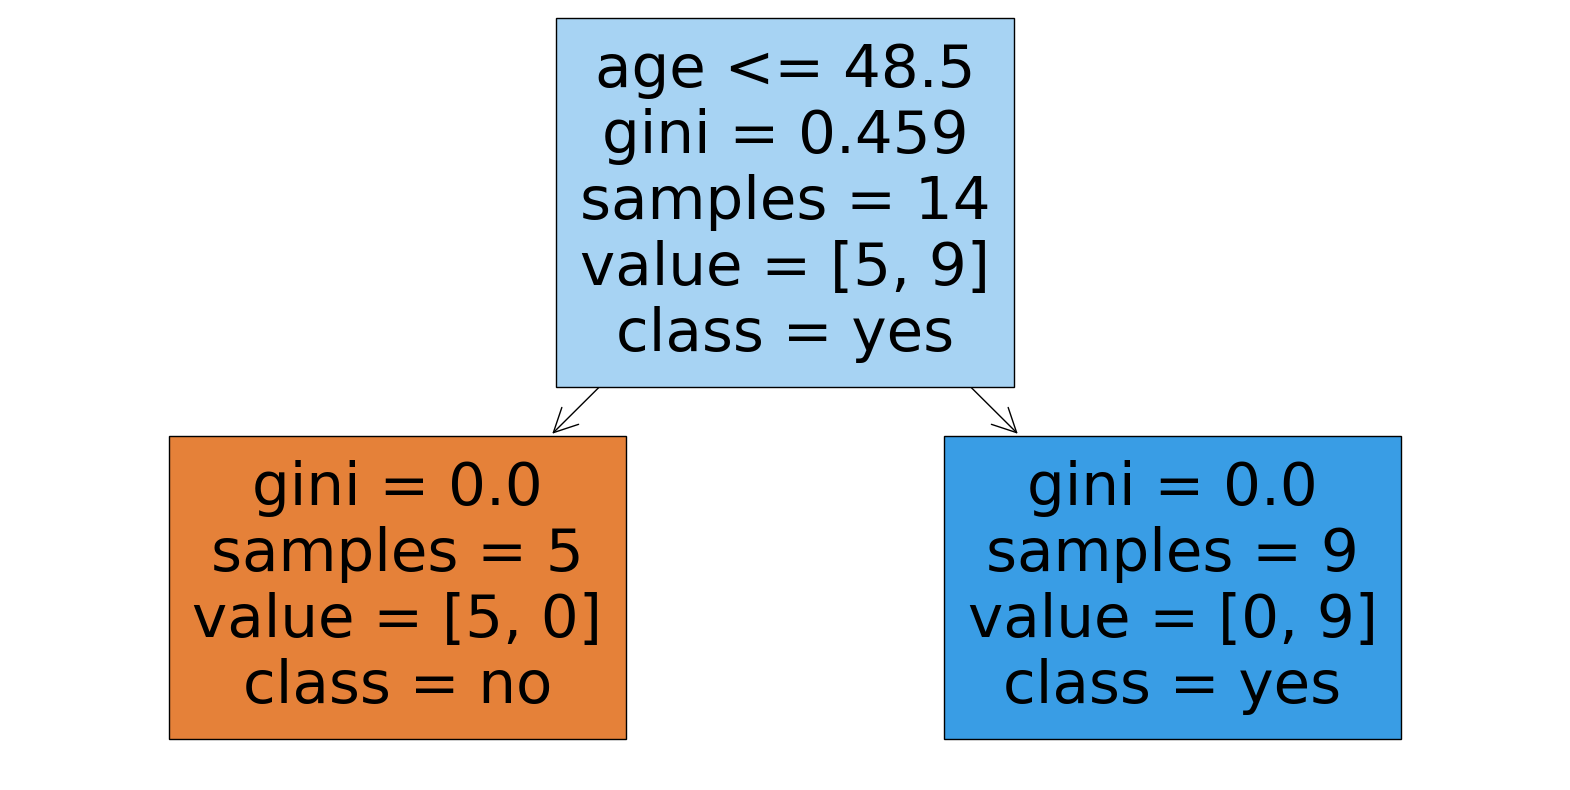

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

# Sample data from the Bank Marketing dataset
data = {
    'age': [30, 33, 35, 38, 40, 42, 44, 47, 50, 52],
    'job': ['blue-collar', 'services', 'admin.', 'admin.', 'admin.', 'management', 'technician', 'blue-collar', 'self-employed', 'self-employed'],
    'marital': ['married', 'married', 'single', 'married', 'single', 'single', 'single', 'divorced', 'married', 'divorced'],
    'education': ['basic.9y', 'high.school', 'high.school', 'basic.9y', 'basic.9y', 'university.degree', 'professional.course', 'basic.9y', 'basic.9y', 'basic.9y'],
    'default': ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
    'balance': [2143, 231, 447, 147, 482, 50, 227, -89, 9374, 283],
    'housing': ['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no'],
    'loan': ['no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes'],
    'contact': ['unknown', 'cellular', 'cellular', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown'],
    'day': [5, 13, 5, 5, 5, 5, 5, 5, 5, 5],
    'month': ['may', 'may', 'may', 'may', 'may', 'may', 'may', 'may', 'may', 'may'],
    'duration': [261, 151, 76, 92, 198, 139, 217, 380, 50, 55],
    'campaign': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'pdays': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    'previous': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'poutcome': ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown'],
    'y': ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Data preprocessing
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target variable
X = df.drop('y_yes', axis=1)
y = df['y_yes']

# Handle class imbalance by oversampling the minority class
df_majority = df[df.y_yes == 0]
df_minority = df[df.y_yes == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_upsampled = df_upsampled.drop('y_yes', axis=1)
y_upsampled = df_upsampled['y_yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Build decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=1))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()
